# Unit 1: Train your first Deep Reinforcement Learning Agent 🤖

![Cover](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit1/thumbnail.jpg)

In this notebook, you'll train your **first Deep Reinforcement Learning agent** a Lunar Lander agent that will learn to **land correctly on the Moon 🌕**. Using [Stable-Baselines3](https://stable-baselines3.readthedocs.io/en/master/) a Deep Reinforcement Learning library, share them with the community, and experiment with different configurations

⬇️ Here is an example of what **you will achieve in just a couple of minutes.** ⬇️




In [ ]:
%%html
<video controls autoplay><source src="https://huggingface.co/sb3/ppo-LunarLander-v2/resolve/main/replay.mp4" type="video/mp4"></video>

### The environment 🎮

- [LunarLander-v2](https://gymnasium.farama.org/environments/box2d/lunar_lander/)

### The library used 📚

- [Stable-Baselines3](https://stable-baselines3.readthedocs.io/en/master/)

We're constantly trying to improve our tutorials, so **if you find some issues in this notebook**, please [open an issue on the Github Repo](https://github.com/huggingface/deep-rl-class/issues).

## Objectives of this notebook 🏆

At the end of the notebook, you will:

- Be able to use **Gymnasium**, the environment library.
- Be able to use **Stable-Baselines3**, the deep reinforcement learning library.
- Be able to **push your trained agent to the Hub** with a nice video replay and an evaluation score 🔥.




## This notebook is from Deep Reinforcement Learning Course

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/deep-rl-course-illustration.jpg" alt="Deep RL Course illustration"/>

In this free course, you will:

- 📖 Study Deep Reinforcement Learning in **theory and practice**.
- 🧑‍💻 Learn to **use famous Deep RL libraries** such as Stable Baselines3, RL Baselines3 Zoo, CleanRL and Sample Factory 2.0.
- 🤖 Train **agents in unique environments**
- 🎓 **Earn a certificate of completion** by completing 80% of the assignments.

And more!

Check 📚 the syllabus 👉 https://simoninithomas.github.io/deep-rl-course

Don’t forget to **<a href="http://eepurl.com/ic5ZUD">sign up to the course</a>** (we are collecting your email to be able to **send you the links when each Unit is published and give you information about the challenges and updates).**

The best way to keep in touch and ask questions is **to join our discord server** to exchange with the community and with us 👉🏻 https://discord.gg/ydHrjt3WP5

## Prerequisites 🏗️

Before diving into the notebook, you need to:

🔲 📝 **[Read Unit 0](https://huggingface.co/deep-rl-course/unit0/introduction)** that gives you all the **information about the course and helps you to onboard** 🤗

🔲 📚 **Develop an understanding of the foundations of Reinforcement learning** (RL process, Rewards hypothesis...) by [reading Unit 1](https://huggingface.co/deep-rl-course/unit1/introduction).

## A small recap of Deep Reinforcement Learning 📚

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit1/RL_process_game.jpg" alt="The RL process" width="100%">

Let's do a small recap on what we learned in the first Unit:

- Reinforcement Learning is a **computational approach to learning from actions**. We build an agent that learns from the environment by **interacting with it through trial and error** and receiving rewards (negative or positive) as feedback.

- The goal of any RL agent is to **maximize its expected cumulative reward** (also called expected return) because RL is based on the _reward hypothesis_, which is that all goals can be described as the maximization of an expected cumulative reward.

- The RL process is a **loop that outputs a sequence of state, action, reward, and next state**.

- To calculate the expected cumulative reward (expected return), **we discount the rewards**: the rewards that come sooner (at the beginning of the game) are more probable to happen since they are more predictable than the long-term future reward.

- To solve an RL problem, you want to **find an optimal policy**; the policy is the "brain" of your AI that will tell us what action to take given a state. The optimal one is the one that gives you the actions that max the expected return.

There are **two** ways to find your optimal policy:

- By **training your policy directly**: policy-based methods.
- By **training a value function** that tells us the expected return the agent will get at each state and use this function to define our policy: value-based methods.

- Finally, we spoke about Deep RL because **we introduce deep neural networks to estimate the action to take (policy-based) or to estimate the value of a state (value-based) hence the name "deep."**

# Let's train our first Deep Reinforcement Learning agent and upload it to the Hub 🚀

## Get a certificate 🎓

To validate this hands-on for the [certification process](https://huggingface.co/deep-rl-course/en/unit0/introduction#certification-process), you need to push your trained model to the Hub and **get a result of >= 200**.

To find your result, go to the [leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard) and find your model, **the result = mean_reward - std of reward**

For more information about the certification process, check this section 👉 https://huggingface.co/deep-rl-course/en/unit0/introduction#certification-process

## Set the GPU 💪

- To **accelerate the agent's training, we'll use a GPU**. To do that, go to `Runtime > Change Runtime type`

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/gpu-step1.jpg" alt="GPU Step 1">

- `Hardware Accelerator > GPU`

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/gpu-step2.jpg" alt="GPU Step 2">

## Install dependencies and create a virtual screen 🔽

The first step is to install the dependencies, we’ll install multiple ones.

- `gymnasium[box2d]`: Contains the LunarLander-v2 environment 🌛
- `stable-baselines3[extra]`: The deep reinforcement learning library.
- `huggingface_sb3`: Additional code for Stable-baselines3 to load and upload models from the Hugging Face 🤗 Hub.

To make things easier, we created a script to install all these dependencies.

In [ ]:
!apt install swig cmake

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 2s (452 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubunt

In [ ]:
!pip install -r https://raw.githubusercontent.com/huggingface/deep-rl-class/main/notebooks/unit1/requirements-unit1.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 32.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of gymnasium[box2d] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.8/953.8 kB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 31.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 40.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none

During the notebook, we'll need to generate a replay video. To do so, with colab, **we need to have a virtual screen to be able to render the environment** (and thus record the frames).

Hence the following cell will install virtual screen libraries and create and run a virtual screen 🖥

In [ ]:
!sudo apt-get update
!sudo apt-get install -y python3-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [929 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,922 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 http://archive.ubuntu.com/ubuntu

In [ ]:
!pip install optuna

import numpy as np
from stable_baselines3 import PPO



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.5 MB/s eta 0:00:00


To make sure the new installed libraries are used, **sometimes it's required to restart the notebook runtime**. The next cell will force the **runtime to crash, so you'll need to connect again and run the code starting from here**. Thanks to this trick, **we will be able to run our virtual screen.**

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

## Import the packages 📦

One additional library we import is huggingface_hub **to be able to upload and download trained models from the hub**.


The Hugging Face Hub 🤗 works as a central place where anyone can share and explore models and datasets. It has versioning, metrics, visualizations and other features that will allow you to easily collaborate with others.

You can see here all the Deep reinforcement Learning models available here👉 https://huggingface.co/models?pipeline_tag=reinforcement-learning&sort=downloads



In [ ]:
import gymnasium

from huggingface_sb3 import load_from_hub, package_to_hub
from huggingface_hub import notebook_login # To log to our Hugging Face account to be able to upload models to the Hub.

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

## Understand Gymnasium and how it works 🤖

🏋 The library containing our environment is called Gymnasium.
**You'll use Gymnasium a lot in Deep Reinforcement Learning.**

Gymnasium is the **new version of Gym library** [maintained by the Farama Foundation](https://farama.org/).

The Gymnasium library provides two things:

- An interface that allows you to **create RL environments**.
- A **collection of environments** (gym-control, atari, box2D...).

Let's look at an example, but first let's recall the RL loop.

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit1/RL_process_game.jpg" alt="The RL process" width="100%">

At each step:
- Our Agent receives a **state (S0)** from the **Environment** — we receive the first frame of our game (Environment).
- Based on that **state (S0),** the Agent takes an **action (A0)** — our Agent will move to the right.
- The environment transitions to a **new** **state (S1)** — new frame.
- The environment gives some **reward (R1)** to the Agent — we’re not dead *(Positive Reward +1)*.


With Gymnasium:

1️⃣ We create our environment using `gymnasium.make()`

2️⃣ We reset the environment to its initial state with `observation = env.reset()`

At each step:

3️⃣ Get an action using our model (in our example we take a random action)

4️⃣ Using `env.step(action)`, we perform this action in the environment and get
- `observation`: The new state (st+1)
- `reward`: The reward we get after executing the action
- `terminated`: Indicates if the episode terminated (agent reach the terminal state)
- `truncated`: Introduced with this new version, it indicates a timelimit or if an agent go out of bounds of the environment for instance.
- `info`: A dictionary that provides additional information (depends on the environment).

For more explanations check this 👉 https://gymnasium.farama.org/api/env/#gymnasium.Env.step

If the episode is terminated:
- We reset the environment to its initial state with `observation = env.reset()`

**Let's look at an example!** Make sure to read the code


In [ ]:
import gymnasium as gym

# First, we create our environment called LunarLander-v2
env = gym.make("LunarLander-v2")

# Then we reset this environment
observation, info = env.reset()

for _ in range(20):
  # Take a random action
  action = env.action_space.sample()
  print("Action taken:", action)

  # Do this action in the environment and get
  # next_state, reward, terminated, truncated and info
  observation, reward, terminated, truncated, info = env.step(action)

  # If the game is terminated (in our case we land, crashed) or truncated (timeout)
  if terminated or truncated:
      # Reset the environment
      print("Environment is reset")
      observation, info = env.reset()

env.close()

Action taken: 2
Action taken: 2
Action taken: 2
Action taken: 0
Action taken: 1
Action taken: 0
Action taken: 1
Action taken: 1
Action taken: 1
Action taken: 2
Action taken: 2
Action taken: 0
Action taken: 0
Action taken: 3
Action taken: 2
Action taken: 0
Action taken: 0
Action taken: 0
Action taken: 2
Action taken: 0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'sdfgh' is not defined

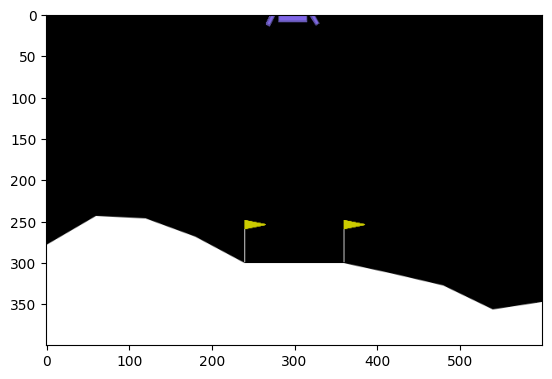

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()


envr = gym.make("LunarLander-v2", render_mode="rgb_array")
envr.reset()
prev_screen = envr.render()
plt.imshow(prev_screen)

for i in range(50):
  action = envr.action_space.sample()
  obs, reward, done, done2, info = envr.step(action)
  screen = envr.render()

  plt.imshow(screen)
  sdfgh
  ipythondisplay.clear_output()
  ipythondisplay.display(plt.gcf())

  if done or done2:
    break

ipythondisplay.clear_output(wait=True)
env.close()


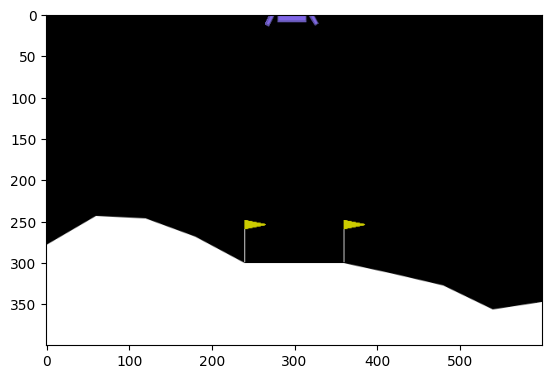

In [ ]:
action = envr.action_space.sample()
obs, reward, done, done2, info = envr.step(action)
screen = envr.render()

plt.imshow(screen)

## Create the LunarLander environment 🌛 and understand how it works

### [The environment 🎮](https://gymnasium.farama.org/environments/box2d/lunar_lander/)

In this first tutorial, we’re going to train our agent, a [Lunar Lander](https://gymnasium.farama.org/environments/box2d/lunar_lander/), **to land correctly on the moon**. To do that, the agent needs to learn **to adapt its speed and position (horizontal, vertical, and angular) to land correctly.**

---


💡 A good habit when you start to use an environment is to check its documentation

👉 https://gymnasium.farama.org/environments/box2d/lunar_lander/

---


Let's see what the Environment looks like:


In [ ]:
# We create our environment with gym.make("<name_of_the_environment>")
env = gym.make("LunarLander-v2")
env.reset()
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space Shape", env.observation_space.shape)
print("Sample observation", env.observation_space.sample()) # Get a random observation

_____OBSERVATION SPACE_____ 

Observation Space Shape (8,)
Sample observation [83.86315    41.9888      4.1694527  -0.48541385 -1.7971293   4.2255435
  0.27640635  0.5078781 ]


We see with `Observation Space Shape (8,)` that the observation is a vector of size 8, where each value contains different information about the lander:
- Horizontal pad coordinate (x)
- Vertical pad coordinate (y)
- Horizontal speed (x)
- Vertical speed (y)
- Angle
- Angular speed
- If the left leg contact point has touched the land (boolean)
- If the right leg contact point has touched the land (boolean)


In [ ]:
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.n)
print("Action Space Sample", env.action_space.sample()) # Take a random action


 _____ACTION SPACE_____ 

Action Space Shape 4
Action Space Sample 2


The action space (the set of possible actions the agent can take) is discrete with 4 actions available 🎮:

- Action 0: Do nothing,
- Action 1: Fire left orientation engine,
- Action 2: Fire the main engine,
- Action 3: Fire right orientation engine.

Reward function (the function that will give a reward at each timestep) 💰:

After every step a reward is granted. The total reward of an episode is the **sum of the rewards for all the steps within that episode**.

For each step, the reward:

- Is increased/decreased the closer/further the lander is to the landing pad.
-  Is increased/decreased the slower/faster the lander is moving.
- Is decreased the more the lander is tilted (angle not horizontal).
- Is increased by 10 points for each leg that is in contact with the ground.
- Is decreased by 0.03 points each frame a side engine is firing.
- Is decreased by 0.3 points each frame the main engine is firing.

The episode receive an **additional reward of -100 or +100 points for crashing or landing safely respectively.**

An episode is **considered a solution if it scores at least 200 points.**

#### Vectorized Environment

- We create a vectorized environment (a method for stacking multiple independent environments into a single environment) of 16 environments, this way, **we'll have more diverse experiences during the training.**

In [ ]:
# Create the environment
env = make_vec_env('LunarLander-v2', n_envs=16)

## Create the Model 🤖
- We have studied our environment and we understood the problem: **being able to land the Lunar Lander to the Landing Pad correctly by controlling left, right and main orientation engine**. Now let's build the algorithm we're going to use to solve this Problem 🚀.

- To do so, we're going to use our first Deep RL library, [Stable Baselines3 (SB3)](https://stable-baselines3.readthedocs.io/en/master/).

- SB3 is a set of **reliable implementations of reinforcement learning algorithms in PyTorch**.

---

💡 A good habit when using a new library is to dive first on the documentation: https://stable-baselines3.readthedocs.io/en/master/ and then try some tutorials.

----

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit1/sb3.png" alt="Stable Baselines3">

To solve this problem, we're going to use SB3 **PPO**. [PPO (aka Proximal Policy Optimization) is one of the SOTA (state of the art) Deep Reinforcement Learning algorithms that you'll study during this course](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#example%5D).

PPO is a combination of:
- *Value-based reinforcement learning method*: learning an action-value function that will tell us the **most valuable action to take given a state and action**.
- *Policy-based reinforcement learning method*: learning a policy that will **give us a probability distribution over actions**.

Stable-Baselines3 is easy to set up:

1️⃣ You **create your environment** (in our case it was done above)

2️⃣ You define the **model you want to use and instantiate this model** `model = PPO("MlpPolicy")`

3️⃣ You **train the agent** with `model.learn` and define the number of training timesteps

```
# Create environment
env = gym.make('LunarLander-v2')

# Instantiate the agent
model = PPO('MlpPolicy', env, verbose=1)
# Train the agent
model.learn(total_timesteps=int(2e5))
```



In [ ]:
# TODO: Define a PPO MlpPolicy architecture
# We use MultiLayerPerceptron (MLPPolicy) because the input is a vector,
# if we had frames as input we would use CnnPolicy
model = PPO('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=1500000)#ich

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
|    value_loss           | 53.9         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 499         |
|    ep_rew_mean          | 137         |
| time/                   |             |
|    fps                  | 427         |
|    iterations           | 496         |
|    time_elapsed         | 2378        |
|    total_timesteps      | 1015808     |
| train/                  |             |
|    approx_kl            | 0.008301543 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.506      |
|    explained_variance   | 0.848       |
|    learning_rate        | 0.0003      |
|    loss                 | 6.74        |
|    n_updates            | 4950        |
|    policy_gradient_loss | 0.0021      |
|    value_loss           | 31.9        |
-------

In [ ]:
#ich
# Save the model
model_name = "ppo-LunarLander-v2"
model.save(model_name)

In [ ]:
model_tuned = PPO('MlpPolicy', env, verbose=1,
                  n_steps = 2**9,
                  gamma = 1-0.006075594024321983,
                  max_grad_norm=1.8559426752164974,
                  learning_rate=0.0011176199638550707)
model_tuned.learn(total_timesteps=1500000)#ich

Using cuda device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 87.7     |
|    ep_rew_mean     | -178     |
| time/              |          |
|    fps             | 2010     |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 98.4        |
|    ep_rew_mean          | -158        |
| time/                   |             |
|    fps                  | 1340        |
|    iterations           | 2           |
|    time_elapsed         | 12          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.009433961 |
|    clip_fraction        | 0.083       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | -0.00253    |
|    learnin

In [ ]:
#ich
# Save the model
model_name = "ppo-LunarLander-v2"
model_tuned.save(model_name)

In [ ]:
import gymnasium as gym
# TODO: Evaluate the agent
# Create a new environment for evaluation
eval_env =  Monitor(gym.make("LunarLander-v2"))

# Evaluate the model with 10 evaluation episodes and deterministic=True
mean_reward, std_reward = evaluate_policy(model_tuned, eval_env, n_eval_episodes=10, deterministic=True)


# Print the results
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")


mean_reward=285.21 +/- 15.543558761129864


#### Solution

In [ ]:
# SOLUTION
# We added some parameters to accelerate the training
model = PPO(
    policy = 'MlpPolicy',
    env = env,
    n_steps = 1024,
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.999,
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1)

## Train the PPO agent 🏃
- Let's train our agent for 1,000,000 timesteps, don't forget to use GPU on Colab. It will take approximately ~20min, but you can use fewer timesteps if you just want to try it out.
- During the training, take a ☕ break you deserved it 🤗

In [ ]:
# TODO: Train it for 1,000,000 timesteps

# TODO: Specify file name for model and save the model to file
model_name = "ppo-LunarLander-v2-optuna-tuned"


#### Solution

In [ ]:
# SOLUTION
# Train it for 1,000,000 timesteps
model.learn(total_timesteps=1000000)
# Save the model
model_name = "ppo-LunarLander-v2"
model.save(model_name)#saved where???

In [ ]:
del model
model = DQN.load("ppo-LunarLander-v2", env=env)

## Evaluate the agent 📈
- Remember to wrap the environment in a [Monitor](https://stable-baselines3.readthedocs.io/en/master/common/monitor.html).
- Now that our Lunar Lander agent is trained 🚀, we need to **check its performance**.
- Stable-Baselines3 provides a method to do that: `evaluate_policy`.
- To fill that part you need to [check the documentation](https://stable-baselines3.readthedocs.io/en/master/guide/examples.html#basic-usage-training-saving-loading)
- In the next step,  we'll see **how to automatically evaluate and share your agent to compete in a leaderboard, but for now let's do it ourselves**


💡 When you evaluate your agent, you should not use your training environment but create an evaluation environment.

In [ ]:
# TODO: Evaluate the agent
# Create a new environment for evaluation
eval_env =  Monitor(gym.make("LunarLander-v2"))

# Evaluate the model with 10 evaluation episodes and deterministic=True
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)


# Print the results
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")


mean_reward=173.26 +/- 104.41973128975222


In [ ]:
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)


# Print the results
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

#### Solution

In [ ]:
#@title
eval_env = Monitor(gym.make("LunarLander-v2"))
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

- In my case, I got a mean reward of `200.20 +/- 20.80` after training for 1 million steps, which means that our lunar lander agent is ready to land on the moon 🌛🥳.

# Optuna :)



In [ ]:
import optuna
from optuna.pruners import MedianPruner
from optuna.samplers import TPESampler
from optuna.visualization import plot_optimization_history, plot_param_importances

In [ ]:
N_TRIALS = 100  # Maximum number of trials
N_JOBS = 1 # Number of jobs to run in parallel
N_STARTUP_TRIALS = 5  # Stop random sampling after N_STARTUP_TRIALS
N_EVALUATIONS = 2  # Number of evaluations during the training
N_TIMESTEPS = int(2e4)  # Training budget
EVAL_FREQ = int(N_TIMESTEPS / N_EVALUATIONS)
N_EVAL_ENVS = 5
N_EVAL_EPISODES = 10
TIMEOUT = int(60 * 30)  #30 #15 minutes

ENV_ID = "LunarLander-v2"

DEFAULT_HYPERPARAMS = {
    "policy": "MlpPolicy",
    "env": ENV_ID,
}



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from typing import Any, Dict
import torch
import torch.nn as nn

def sample_ppo_params(trial: optuna.Trial) -> Dict[str, Any]:
    """
    Sampler for A2C hyperparameters.

    :param trial: Optuna trial object
    :return: The sampled hyperparameters for the given trial.
    """
    # Discount factor between 0.9 and 0.9999
    gamma = 1.0 - trial.suggest_float("gamma", 0.0001, 0.1, log=True)
    max_grad_norm = trial.suggest_float("max_grad_norm", 0.3, 5.0, log=True)
    # 8, 16, 32, ... 1024 geändert
    n_steps = 2 ** trial.suggest_int("exponent_n_steps", 8, 12)

    ### YOUR CODE HERE
    # TODO:
    # - define the learning rate search space [1e-5, 1] (log) -> `suggest_float`
    # - define the network architecture search space ["tiny", "small"] -> `suggest_categorical`
    # - define the activation function search space ["tanh", "relu"]
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1, log=True)
    #net_arch = ...
    #activation_fn = trial.suggest_categorical("activation_fn", ["tanh", "relu"])

    ### END OF YOUR CODE

    # Display true values
    trial.set_user_attr("gamma_", gamma)
    trial.set_user_attr("n_steps", n_steps)

    """
    net_arch = [
        {"pi": [64], "vf": [64]}
        if net_arch == "tiny"
        else {"pi": [64, 64], "vf": [64, 64]}
    ]"""

    #activation_fn = {"tanh": nn.Tanh, "relu": nn.ReLU}[activation_fn]

    return {
        "n_steps": n_steps,
        "gamma": gamma,
        "learning_rate": learning_rate,
        "max_grad_norm": max_grad_norm,
        #"policy_kwargs": {
            #"net_arch": net_arch,
            #"activation_fn": activation_fn,
        #},
    }

In [ ]:
from stable_baselines3.common.callbacks import EvalCallback

class TrialEvalCallback(EvalCallback):
    """
    Callback used for evaluating and reporting a trial.

    :param eval_env: Evaluation environement
    :param trial: Optuna trial object
    :param n_eval_episodes: Number of evaluation episodes
    :param eval_freq:   Evaluate the agent every ``eval_freq`` call of the callback.
    :param deterministic: Whether the evaluation should
        use a stochastic or deterministic policy.
    :param verbose:
    """

    def __init__(
        self,
        eval_env: gym.Env,
        trial: optuna.Trial,
        n_eval_episodes: int = 5,
        eval_freq: int = 10000,
        deterministic: bool = True,
        verbose: int = 0,
    ):

        super().__init__(
            eval_env=eval_env,
            n_eval_episodes=n_eval_episodes,
            eval_freq=eval_freq,
            deterministic=deterministic,
            verbose=verbose,
        )
        self.trial = trial
        self.eval_idx = 0
        self.is_pruned = False

    def _on_step(self) -> bool:
        if self.eval_freq > 0 and self.n_calls % self.eval_freq == 0:
            # Evaluate policy (done in the parent class)
            super()._on_step()
            self.eval_idx += 1
            # Send report to Optuna
            self.trial.report(self.last_mean_reward, self.eval_idx)
            # Prune trial if need
            if self.trial.should_prune():
                self.is_pruned = True
                return False
        return True

In [ ]:
def objective(trial: optuna.Trial) -> float:
    """
    Objective function using by Optuna to evaluate
    one configuration (i.e., one set of hyperparameters).

    Given a trial object, it will sample hyperparameters,
    evaluate it and report the result (mean episodic reward after training)

    :param trial: Optuna trial object
    :return: Mean episodic reward after training
    """

    kwargs = DEFAULT_HYPERPARAMS.copy()
    ### YOUR CODE HERE
    # TODO:
    # 1. Sample hyperparameters and update the default keyword arguments: `kwargs.update(other_params)`
    # 2. Create the evaluation envs
    # 3. Create the `TrialEvalCallback`

    # 1. Sample hyperparameters and update the keyword arguments
    kwargs.update(sample_ppo_params(trial))
    # Create the RL model
    model = PPO(**kwargs)

    # 2. Create envs used for evaluation using `make_vec_env`, `ENV_ID` and `N_EVAL_ENVS`
    eval_envs = make_vec_env(ENV_ID, n_envs=N_EVAL_ENVS)
    # 3. Create the `TrialEvalCallback` callback defined above that will periodically evaluate
    # and report the performance using `N_EVAL_EPISODES` every `EVAL_FREQ`
    # TrialEvalCallback signature:
    # TrialEvalCallback(eval_env, trial, n_eval_episodes, eval_freq, deterministic, verbose)
    eval_callback = TrialEvalCallback(
        eval_envs, trial,
        n_eval_episodes=N_EVAL_EPISODES, eval_freq=EVAL_FREQ, deterministic=False, verbose=1
    )

    ### END OF YOUR CODE

    nan_encountered = False
    try:
        # Train the model
        model.learn(N_TIMESTEPS, callback=eval_callback)
    except AssertionError as e:
        # Sometimes, random hyperparams can generate NaN
        print(e)
        nan_encountered = True
    finally:
        # Free memory
        model.env.close()
        eval_envs.close()

    # Tell the optimizer that the trial failed
    if nan_encountered:
        return float("nan")

    if eval_callback.is_pruned:
        raise optuna.exceptions.TrialPruned()

    return eval_callback.last_mean_reward

In [ ]:
import torch as th

# Set pytorch num threads to 1 for faster training
th.set_num_threads(1)
# Select the sampler, can be random, TPESampler, CMAES, ...
sampler = TPESampler(n_startup_trials=N_STARTUP_TRIALS)
# Do not prune before 1/3 of the max budget is used
pruner = MedianPruner(
    n_startup_trials=N_STARTUP_TRIALS, n_warmup_steps=11#N_EVALUATIONS // 3
)
# Create the study and start the hyperparameter optimization
study = optuna.create_study(sampler=sampler, pruner=pruner, direction="maximize")

#include standard params :)
study.enqueue_trial({
     "gamma": 1-0.99,
     "max_grad_norm": 0.5,
     "learning_rate": 0.0003
}
)

try:
    study.optimize(objective, n_trials=N_TRIALS, n_jobs=N_JOBS, timeout=TIMEOUT)
except KeyboardInterrupt:
    pass

print("Number of finished trials: ", len(study.trials))

print("Best trial:")
trial = study.best_trial

print(f"  Value: {trial.value}")

print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

print("  User attrs:")
for key, value in trial.user_attrs.items():
    print(f"    {key}: {value}")

# Write report
study.trials_dataframe().to_csv("study_results_a2c_cartpole.csv")

fig1 = plot_optimization_history(study)
fig2 = plot_param_importances(study)

fig1.show()
fig2.show()

[I 2024-06-21 07:06:50,989] A new study created in memory with name: no-name-02eb9dfc-ab5f-4d2e-a90e-031a2b6b9561


Eval num_timesteps=10000, episode_reward=-166.78 +/- 100.36
Episode length: 128.30 +/- 22.34
New best mean reward!
Eval num_timesteps=20000, episode_reward=-140.89 +/- 108.97
Episode length: 190.40 +/- 36.48
New best mean reward!


[I 2024-06-21 07:08:00,396] Trial 0 finished with value: -140.89088580000004 and parameters: {'gamma': 0.010000000000000009, 'max_grad_norm': 0.5, 'exponent_n_steps': 10, 'learning_rate': 0.0003}. Best is trial 0 with value: -140.89088580000004.


Eval num_timesteps=10000, episode_reward=-532.54 +/- 170.96
Episode length: 64.60 +/- 10.23
New best mean reward!
Eval num_timesteps=20000, episode_reward=-680.22 +/- 147.90
Episode length: 74.90 +/- 13.49


[I 2024-06-21 07:08:53,630] Trial 1 finished with value: -680.218778 and parameters: {'gamma': 0.006386863321771126, 'max_grad_norm': 4.394368448565919, 'exponent_n_steps': 11, 'learning_rate': 0.09441575033584668}. Best is trial 0 with value: -140.89088580000004.


Eval num_timesteps=10000, episode_reward=-514.25 +/- 120.89
Episode length: 66.40 +/- 14.97
New best mean reward!
Eval num_timesteps=20000, episode_reward=-607.98 +/- 138.34
Episode length: 65.60 +/- 11.44


[I 2024-06-21 07:09:44,920] Trial 2 finished with value: -607.9839039000001 and parameters: {'gamma': 0.00014223117433557477, 'max_grad_norm': 0.7062802622404362, 'exponent_n_steps': 10, 'learning_rate': 0.2893891436067333}. Best is trial 0 with value: -140.89088580000004.


Eval num_timesteps=10000, episode_reward=-159.53 +/- 103.37
Episode length: 93.70 +/- 20.21
New best mean reward!
Eval num_timesteps=20000, episode_reward=-178.25 +/- 101.20
Episode length: 84.20 +/- 17.08


[I 2024-06-21 07:10:36,176] Trial 3 finished with value: -178.2513414 and parameters: {'gamma': 0.0037798286192951606, 'max_grad_norm': 1.5819785343399344, 'exponent_n_steps': 12, 'learning_rate': 1.3714737408556629e-05}. Best is trial 0 with value: -140.89088580000004.


Eval num_timesteps=10000, episode_reward=-75.71 +/- 58.71
Episode length: 112.00 +/- 23.03
New best mean reward!
Eval num_timesteps=20000, episode_reward=-41.04 +/- 91.10
Episode length: 547.50 +/- 318.13
New best mean reward!


[I 2024-06-21 07:11:39,591] Trial 4 finished with value: -41.0395348 and parameters: {'gamma': 0.0005973482521263276, 'max_grad_norm': 2.41482259354506, 'exponent_n_steps': 9, 'learning_rate': 0.010500019576301626}. Best is trial 4 with value: -41.0395348.


Eval num_timesteps=10000, episode_reward=-159.05 +/- 110.78
Episode length: 144.60 +/- 20.88
New best mean reward!
Eval num_timesteps=20000, episode_reward=-34.56 +/- 102.35
Episode length: 158.40 +/- 38.41
New best mean reward!


[I 2024-06-21 07:12:37,243] Trial 5 finished with value: -34.5613051 and parameters: {'gamma': 0.00021558042820451996, 'max_grad_norm': 2.538096202465164, 'exponent_n_steps': 8, 'learning_rate': 0.005102338467254626}. Best is trial 5 with value: -34.5613051.


Eval num_timesteps=10000, episode_reward=-193.13 +/- 103.77
Episode length: 133.20 +/- 29.38
New best mean reward!
Eval num_timesteps=20000, episode_reward=-56.27 +/- 77.01
Episode length: 289.30 +/- 240.77
New best mean reward!


[I 2024-06-21 07:13:34,229] Trial 6 finished with value: -56.2732172 and parameters: {'gamma': 0.00013407555665877972, 'max_grad_norm': 4.6928202088713284, 'exponent_n_steps': 8, 'learning_rate': 0.0004626623132401827}. Best is trial 5 with value: -34.5613051.


Eval num_timesteps=10000, episode_reward=-615.73 +/- 111.52
Episode length: 99.30 +/- 11.43
New best mean reward!
Eval num_timesteps=20000, episode_reward=-135.39 +/- 81.29
Episode length: 227.40 +/- 72.61
New best mean reward!


[I 2024-06-21 07:14:29,291] Trial 7 finished with value: -135.39342919999999 and parameters: {'gamma': 0.05266178258746849, 'max_grad_norm': 1.0059911531773587, 'exponent_n_steps': 8, 'learning_rate': 0.008637685530174312}. Best is trial 5 with value: -34.5613051.


Eval num_timesteps=10000, episode_reward=-90.72 +/- 60.32
Episode length: 146.40 +/- 28.98
New best mean reward!
Eval num_timesteps=20000, episode_reward=-42.87 +/- 67.07
Episode length: 247.60 +/- 251.81
New best mean reward!


[I 2024-06-21 07:15:29,939] Trial 8 finished with value: -42.8676138 and parameters: {'gamma': 0.0005759972786657972, 'max_grad_norm': 2.178198098691272, 'exponent_n_steps': 9, 'learning_rate': 0.0006154119197118329}. Best is trial 5 with value: -34.5613051.


Eval num_timesteps=10000, episode_reward=-124.80 +/- 47.94
Episode length: 68.60 +/- 11.77
New best mean reward!
Eval num_timesteps=20000, episode_reward=-124.41 +/- 48.36
Episode length: 69.60 +/- 13.21
New best mean reward!


[I 2024-06-21 07:16:18,849] Trial 9 finished with value: -124.4060378 and parameters: {'gamma': 0.0008050504720345619, 'max_grad_norm': 0.3286023130633277, 'exponent_n_steps': 8, 'learning_rate': 0.9131802052506558}. Best is trial 5 with value: -34.5613051.


Eval num_timesteps=10000, episode_reward=-183.85 +/- 137.64
Episode length: 93.80 +/- 21.31
New best mean reward!
Eval num_timesteps=20000, episode_reward=-140.82 +/- 72.97
Episode length: 89.00 +/- 23.83
New best mean reward!


[I 2024-06-21 07:17:09,828] Trial 10 finished with value: -140.8161907 and parameters: {'gamma': 0.05662749164475368, 'max_grad_norm': 2.702817366937843, 'exponent_n_steps': 9, 'learning_rate': 1.7536377840513823e-05}. Best is trial 5 with value: -34.5613051.


Eval num_timesteps=10000, episode_reward=-158.63 +/- 70.36
Episode length: 240.90 +/- 83.03
New best mean reward!
Eval num_timesteps=20000, episode_reward=-161.07 +/- 96.52
Episode length: 90.90 +/- 18.31


[I 2024-06-21 07:18:06,150] Trial 11 finished with value: -161.0745164 and parameters: {'gamma': 0.0007356403275759354, 'max_grad_norm': 2.6120038390626377, 'exponent_n_steps': 9, 'learning_rate': 0.013966444638642802}. Best is trial 5 with value: -34.5613051.


Eval num_timesteps=10000, episode_reward=-124.63 +/- 55.50
Episode length: 74.40 +/- 8.31
New best mean reward!
Eval num_timesteps=20000, episode_reward=-110.18 +/- 54.03
Episode length: 78.40 +/- 12.22
New best mean reward!


[I 2024-06-21 07:18:54,547] Trial 12 finished with value: -110.17941379999999 and parameters: {'gamma': 0.00034999108842769417, 'max_grad_norm': 1.5533282494775675, 'exponent_n_steps': 9, 'learning_rate': 0.03016602553405144}. Best is trial 5 with value: -34.5613051.


Eval num_timesteps=10000, episode_reward=-51.82 +/- 83.86
Episode length: 233.60 +/- 102.43
New best mean reward!
Eval num_timesteps=20000, episode_reward=-192.24 +/- 106.57
Episode length: 656.90 +/- 238.23


[I 2024-06-21 07:20:12,106] Trial 13 finished with value: -192.24408069999998 and parameters: {'gamma': 0.0016642767572459288, 'max_grad_norm': 3.24974427726822, 'exponent_n_steps': 8, 'learning_rate': 0.002396669124994751}. Best is trial 5 with value: -34.5613051.


Eval num_timesteps=10000, episode_reward=-89.81 +/- 66.10
Episode length: 142.20 +/- 45.14
New best mean reward!
Eval num_timesteps=20000, episode_reward=-9.85 +/- 27.21
Episode length: 168.90 +/- 31.16
New best mean reward!


[I 2024-06-21 07:21:08,346] Trial 14 finished with value: -9.8521702 and parameters: {'gamma': 0.0002600392648406912, 'max_grad_norm': 1.7464162922335436, 'exponent_n_steps': 9, 'learning_rate': 0.0023634795221302986}. Best is trial 14 with value: -9.8521702.


Eval num_timesteps=10000, episode_reward=-97.67 +/- 66.60
Episode length: 117.60 +/- 26.17
New best mean reward!
Eval num_timesteps=20000, episode_reward=-35.49 +/- 47.34
Episode length: 175.30 +/- 28.97
New best mean reward!


[I 2024-06-21 07:22:01,536] Trial 15 finished with value: -35.4859521 and parameters: {'gamma': 0.00010749029702825214, 'max_grad_norm': 1.1083175833707903, 'exponent_n_steps': 11, 'learning_rate': 0.0017748932882514477}. Best is trial 14 with value: -9.8521702.


Eval num_timesteps=10000, episode_reward=-167.46 +/- 67.75
Episode length: 92.10 +/- 19.37
New best mean reward!
Eval num_timesteps=20000, episode_reward=-146.81 +/- 70.97
Episode length: 94.80 +/- 18.19
New best mean reward!


[I 2024-06-21 07:22:52,575] Trial 16 finished with value: -146.813144 and parameters: {'gamma': 0.00026374676804712425, 'max_grad_norm': 1.8480529154769332, 'exponent_n_steps': 8, 'learning_rate': 6.758512464046624e-05}. Best is trial 14 with value: -9.8521702.


Eval num_timesteps=10000, episode_reward=-523.47 +/- 158.51
Episode length: 70.50 +/- 16.88
New best mean reward!
Eval num_timesteps=20000, episode_reward=-674.66 +/- 194.18
Episode length: 72.90 +/- 10.90


[I 2024-06-21 07:23:43,664] Trial 17 finished with value: -674.6649119000001 and parameters: {'gamma': 0.001832494345692276, 'max_grad_norm': 0.8826727066389795, 'exponent_n_steps': 10, 'learning_rate': 0.05242890944978285}. Best is trial 14 with value: -9.8521702.


Eval num_timesteps=10000, episode_reward=-42.52 +/- 44.02
Episode length: 200.70 +/- 62.05
New best mean reward!
Eval num_timesteps=20000, episode_reward=-12.12 +/- 153.03
Episode length: 364.90 +/- 111.33
New best mean reward!


[I 2024-06-21 07:24:43,476] Trial 18 finished with value: -12.118862699999994 and parameters: {'gamma': 0.014173260160020129, 'max_grad_norm': 3.528745243651732, 'exponent_n_steps': 9, 'learning_rate': 0.004081439484472964}. Best is trial 14 with value: -9.8521702.


Eval num_timesteps=10000, episode_reward=-131.55 +/- 57.20
Episode length: 108.90 +/- 33.87
New best mean reward!
Eval num_timesteps=20000, episode_reward=-172.65 +/- 157.90
Episode length: 155.10 +/- 45.01


[I 2024-06-21 07:25:36,445] Trial 19 finished with value: -172.6480927 and parameters: {'gamma': 0.020302854729718288, 'max_grad_norm': 3.7930171430988597, 'exponent_n_steps': 11, 'learning_rate': 0.00012307662464193376}. Best is trial 14 with value: -9.8521702.


Eval num_timesteps=10000, episode_reward=-209.95 +/- 111.37
Episode length: 130.60 +/- 29.65
New best mean reward!
Eval num_timesteps=20000, episode_reward=-158.03 +/- 87.81
Episode length: 179.90 +/- 28.69
New best mean reward!


[I 2024-06-21 07:26:32,717] Trial 20 finished with value: -158.0252963 and parameters: {'gamma': 0.017993812382632625, 'max_grad_norm': 1.3334094770141058, 'exponent_n_steps': 10, 'learning_rate': 0.0011035387033504359}. Best is trial 14 with value: -9.8521702.


Eval num_timesteps=10000, episode_reward=-317.59 +/- 130.98
Episode length: 119.60 +/- 21.54
New best mean reward!
Eval num_timesteps=20000, episode_reward=-20.61 +/- 58.16
Episode length: 194.20 +/- 269.06
New best mean reward!


[I 2024-06-21 07:27:28,542] Trial 21 finished with value: -20.6068542 and parameters: {'gamma': 0.00024860358827230204, 'max_grad_norm': 3.024296290928593, 'exponent_n_steps': 9, 'learning_rate': 0.004635932150831146}. Best is trial 14 with value: -9.8521702.


Eval num_timesteps=10000, episode_reward=-30.96 +/- 28.96
Episode length: 119.40 +/- 26.68
New best mean reward!
Eval num_timesteps=20000, episode_reward=-176.14 +/- 148.41
Episode length: 173.70 +/- 107.76


[I 2024-06-21 07:28:27,483] Trial 22 finished with value: -176.13734570000003 and parameters: {'gamma': 0.0018149489683248383, 'max_grad_norm': 3.3965331474503784, 'exponent_n_steps': 9, 'learning_rate': 0.00341496029158182}. Best is trial 14 with value: -9.8521702.


Eval num_timesteps=10000, episode_reward=-307.03 +/- 246.62
Episode length: 246.10 +/- 117.10
New best mean reward!
Eval num_timesteps=20000, episode_reward=-155.10 +/- 42.32
Episode length: 161.70 +/- 60.52
New best mean reward!


[I 2024-06-21 07:29:22,427] Trial 23 finished with value: -155.10452500000002 and parameters: {'gamma': 0.028763568890075652, 'max_grad_norm': 3.2296972935582584, 'exponent_n_steps': 9, 'learning_rate': 0.023315121877238897}. Best is trial 14 with value: -9.8521702.


Eval num_timesteps=10000, episode_reward=-93.23 +/- 68.06
Episode length: 204.60 +/- 83.62
New best mean reward!
Eval num_timesteps=20000, episode_reward=6.59 +/- 48.70
Episode length: 806.20 +/- 299.75
New best mean reward!


[I 2024-06-21 07:30:35,119] Trial 24 finished with value: 6.585008299999998 and parameters: {'gamma': 0.006075594024321983, 'max_grad_norm': 1.8559426752164974, 'exponent_n_steps': 9, 'learning_rate': 0.0011176199638550707}. Best is trial 24 with value: 6.585008299999998.


Eval num_timesteps=10000, episode_reward=-139.74 +/- 51.47
Episode length: 129.30 +/- 23.86
New best mean reward!
Eval num_timesteps=20000, episode_reward=-107.00 +/- 114.21
Episode length: 146.00 +/- 28.50
New best mean reward!


[I 2024-06-21 07:31:30,243] Trial 25 finished with value: -107.00469200000002 and parameters: {'gamma': 0.007367043589902397, 'max_grad_norm': 1.958856909878627, 'exponent_n_steps': 10, 'learning_rate': 0.000128280155751115}. Best is trial 24 with value: 6.585008299999998.


Eval num_timesteps=10000, episode_reward=-113.75 +/- 66.01
Episode length: 128.50 +/- 25.03
New best mean reward!
Eval num_timesteps=20000, episode_reward=-6.15 +/- 102.98
Episode length: 656.60 +/- 344.29
New best mean reward!


[I 2024-06-21 07:32:37,039] Trial 26 finished with value: -6.149618299999998 and parameters: {'gamma': 0.00350647970429975, 'max_grad_norm': 1.5621852014555846, 'exponent_n_steps': 9, 'learning_rate': 0.001315131525193004}. Best is trial 24 with value: 6.585008299999998.


Eval num_timesteps=10000, episode_reward=-94.57 +/- 40.26
Episode length: 115.50 +/- 28.28
New best mean reward!
Eval num_timesteps=20000, episode_reward=-10.22 +/- 29.56
Episode length: 158.20 +/- 33.16
New best mean reward!


[I 2024-06-21 07:33:28,571] Trial 27 finished with value: -10.2173887 and parameters: {'gamma': 0.0037296843294675826, 'max_grad_norm': 1.4116003054187924, 'exponent_n_steps': 10, 'learning_rate': 0.0011471197011206687}. Best is trial 24 with value: 6.585008299999998.


Eval num_timesteps=10000, episode_reward=-133.97 +/- 107.67
Episode length: 111.20 +/- 12.19
New best mean reward!
Eval num_timesteps=20000, episode_reward=-134.42 +/- 87.66
Episode length: 278.90 +/- 244.38


[I 2024-06-21 07:34:24,583] Trial 28 finished with value: -134.42215259999998 and parameters: {'gamma': 0.0012275078561518743, 'max_grad_norm': 0.8140388935920868, 'exponent_n_steps': 9, 'learning_rate': 0.0002223428920915772}. Best is trial 24 with value: 6.585008299999998.


Eval num_timesteps=10000, episode_reward=-103.85 +/- 39.75
Episode length: 90.60 +/- 16.29
New best mean reward!
Eval num_timesteps=20000, episode_reward=-134.55 +/- 104.62
Episode length: 190.60 +/- 60.08


[I 2024-06-21 07:35:15,573] Trial 29 finished with value: -134.5531878 and parameters: {'gamma': 0.005381618601754265, 'max_grad_norm': 0.5552403372064452, 'exponent_n_steps': 10, 'learning_rate': 0.000803613295379163}. Best is trial 24 with value: 6.585008299999998.


Eval num_timesteps=10000, episode_reward=-168.45 +/- 82.45
Episode length: 82.10 +/- 10.53
New best mean reward!
Eval num_timesteps=20000, episode_reward=-121.91 +/- 44.54
Episode length: 94.30 +/- 25.84
New best mean reward!


[I 2024-06-21 07:36:04,766] Trial 30 finished with value: -121.91198100000001 and parameters: {'gamma': 0.009562389344392503, 'max_grad_norm': 1.7861270786108663, 'exponent_n_steps': 12, 'learning_rate': 4.031555371311173e-05}. Best is trial 24 with value: 6.585008299999998.


Eval num_timesteps=10000, episode_reward=-185.67 +/- 116.15
Episode length: 118.50 +/- 25.87
New best mean reward!
Eval num_timesteps=20000, episode_reward=-102.80 +/- 79.61
Episode length: 352.10 +/- 267.15
New best mean reward!


[I 2024-06-21 07:37:03,134] Trial 31 finished with value: -102.8034991 and parameters: {'gamma': 0.0036604005201865044, 'max_grad_norm': 1.1902658569581193, 'exponent_n_steps': 10, 'learning_rate': 0.0013976778734531338}. Best is trial 24 with value: 6.585008299999998.


Number of finished trials:  32
Best trial:
  Value: 6.585008299999998
  Params: 
    gamma: 0.006075594024321983
    max_grad_norm: 1.8559426752164974
    exponent_n_steps: 9
    learning_rate: 0.0011176199638550707
  User attrs:
    gamma_: 0.993924405975678
    n_steps: 512


oben: 15 Minuten Laufzeot

## Publish our trained model on the Hub 🔥
Now that we saw we got good results after the training, we can publish our trained model on the hub 🤗 with one line of code.

📚 The libraries documentation 👉 https://github.com/huggingface/huggingface_sb3/tree/main#hugging-face--x-stable-baselines3-v20

Here's an example of a Model Card (with Space Invaders):

By using `package_to_hub` **you evaluate, record a replay, generate a model card of your agent and push it to the hub**.

This way:
- You can **showcase our work** 🔥
- You can **visualize your agent playing** 👀
- You can **share with the community an agent that others can use** 💾
- You can **access a leaderboard 🏆 to see how well your agent is performing compared to your classmates** 👉 https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard


To be able to share your model with the community there are three more steps to follow:

1️⃣ (If it's not already done) create an account on Hugging Face ➡ https://huggingface.co/join

2️⃣ Sign in and then, you need to store your authentication token from the Hugging Face website.
- Create a new token (https://huggingface.co/settings/tokens) **with write role**

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/create-token.jpg" alt="Create HF Token">

- Copy the token
- Run the cell below and paste the token

In [ ]:
notebook_login()
!git config --global credential.helper store

If you don't want to use a Google Colab or a Jupyter Notebook, you need to use this command instead: `huggingface-cli login`

3️⃣ We're now ready to push our trained agent to the 🤗 Hub 🔥 using `package_to_hub()` function

Let's fill the `package_to_hub` function:
- `model`: our trained model.
- `model_name`: the name of the trained model that we defined in `model_save`
- `model_architecture`: the model architecture we used, in our case PPO
- `env_id`: the name of the environment, in our case `LunarLander-v2`
- `eval_env`: the evaluation environment defined in eval_env
- `repo_id`: the name of the Hugging Face Hub Repository that will be created/updated `(repo_id = {username}/{repo_name})`

💡 **A good name is {username}/{model_architecture}-{env_id}**

- `commit_message`: message of the commit

In [ ]:
import gymnasium as gym
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env

from huggingface_sb3 import package_to_hub

## TODO: Define a repo_id
## repo_id is the id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
repo_id = "humnrdble/DeepRL-unit1-optuna"

# TODO: Define the name of the environment
env_id = "LunarLander-v2"

# Create the evaluation env and set the render_mode="rgb_array"
eval_env = DummyVecEnv([lambda: Monitor(gym.make(env_id, render_mode="rgb_array"))])


# TODO: Define the model architecture we used
model_architecture = "PPO"

## TODO: Define the commit message
commit_message = "1500000 steps optuna"

# method save, evaluate, generate a model card and record a replay video of your agent before pushing the repo to the hub
package_to_hub(model=model_tuned, # Our trained model
               model_name=model_name, # The name of our trained model
               model_architecture=model_architecture, # The model architecture we used: in our case PPO
               env_id=env_id, # Name of the environment
               eval_env=eval_env, # Evaluation Environment
               repo_id=repo_id, # id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
               commit_message=commit_message)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ℹ This function will save, evaluate, generate a video of your agent,
create a model card and push everything to the hub. It might take up to 1min.
This is a work in progress: if you encounter a bug, please open an issue.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Saving video to /tmp/tmpgw_ykc27/-step-0-to-step-1000.mp4
Moviepy - Building video /tmp/tmpgw_ykc27/-step-0-to-step-1000.mp4.
Moviepy - Writing video /tmp/tmpgw_ykc27/-step-0-to-step-1000.mp4



Moviepy - Done !
Moviepy - video ready /tmp/tmpgw_ykc27/-step-0-to-step-1000.mp4
ℹ Pushing repo humnrdble/DeepRL-unit1-optuna to the Hugging Face
Hub


pytorch_variables.pth:   0%|          | 0.00/864 [00:00<?, ?B/s]

policy.pth:   0%|          | 0.00/43.8k [00:00<?, ?B/s]

policy.optimizer.pth:   0%|          | 0.00/88.4k [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

ppo-LunarLander-v2-optuna-tuned.zip:   0%|          | 0.00/148k [00:00<?, ?B/s]

ℹ Your model is pushed to the Hub. You can view your model here:
https://huggingface.co/humnrdble/DeepRL-unit1-optuna/tree/main/


CommitInfo(commit_url='https://huggingface.co/humnrdble/DeepRL-unit1-optuna/commit/b1fb3f26654ae8bdf360334eb7bbe9ec0c63d3f7', commit_message='1500000 steps optuna', commit_description='', oid='b1fb3f26654ae8bdf360334eb7bbe9ec0c63d3f7', pr_url=None, pr_revision=None, pr_num=None)

#### Solution


In [ ]:
import gymnasium as gym

from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env

from huggingface_sb3 import package_to_hub

# PLACE the variables you've just defined two cells above
# Define the name of the environment
env_id = "LunarLander-v2"

# TODO: Define the model architecture we used
model_architecture = "PPO"

## Define a repo_id
## repo_id is the id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
## CHANGE WITH YOUR REPO ID
repo_id = "ThomasSimonini/ppo-LunarLander-v2" # Change with your repo id, you can't push with mine 😄

## Define the commit message
commit_message = "Upload PPO LunarLander-v2 trained agent"

# Create the evaluation env and set the render_mode="rgb_array"
eval_env = DummyVecEnv([lambda: gym.make(env_id, render_mode="rgb_array")])

# PLACE the package_to_hub function you've just filled here
package_to_hub(model=model, # Our trained model
               model_name=model_name, # The name of our trained model
               model_architecture=model_architecture, # The model architecture we used: in our case PPO
               env_id=env_id, # Name of the environment
               eval_env=eval_env, # Evaluation Environment
               repo_id=repo_id, # id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
               commit_message=commit_message)


Congrats 🥳 you've just trained and uploaded your first Deep Reinforcement Learning agent. The script above should have displayed a link to a model repository such as https://huggingface.co/osanseviero/test_sb3. When you go to this link, you can:
* See a video preview of your agent at the right.
* Click "Files and versions" to see all the files in the repository.
* Click "Use in stable-baselines3" to get a code snippet that shows how to load the model.
* A model card (`README.md` file) which gives a description of the model

Under the hood, the Hub uses git-based repositories (don't worry if you don't know what git is), which means you can update the model with new versions as you experiment and improve your agent.

Compare the results of your LunarLander-v2 with your classmates using the leaderboard 🏆 👉 https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard

## Load a saved LunarLander model from the Hub 🤗
Thanks to [ironbar](https://github.com/ironbar) for the contribution.

Loading a saved model from the Hub is really easy.

You go to https://huggingface.co/models?library=stable-baselines3 to see the list of all the Stable-baselines3 saved models.
1. You select one and copy its repo_id

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit1/copy-id.png" alt="Copy-id"/>

2. Then we just need to use load_from_hub with:
- The repo_id
- The filename: the saved model inside the repo and its extension (*.zip)

Because the model I download from the Hub was trained with Gym (the former version of Gymnasium) we need to install shimmy a API conversion tool that will help us to run the environment correctly.

Shimmy Documentation: https://github.com/Farama-Foundation/Shimmy

In [ ]:
!pip install shimmy

In [ ]:
from huggingface_sb3 import load_from_hub
repo_id = "humnrdble/DeepRL-unit1" # The repo_id
filename = "ppo-LunarLander-v2.zip" # The model filename.zip

# When the model was trained on Python 3.8 the pickle protocol is 5
# But Python 3.6, 3.7 use protocol 4
# In order to get compatibility we need to:
# 1. Install pickle5 (we done it at the beginning of the colab)
# 2. Create a custom empty object we pass as parameter to PPO.load()
custom_objects = {
            "learning_rate": 0.0,
            "lr_schedule": lambda _: 0.0,
            "clip_range": lambda _: 0.0,
}

checkpoint = load_from_hub(repo_id, filename)
model2 = PPO.load(checkpoint, custom_objects=custom_objects, print_system_info=True)

Let's evaluate this agent:

In [ ]:
#@title
eval_env = Monitor(gym.make("LunarLander-v2"))
mean_reward, std_reward = evaluate_policy(model2, eval_env, n_eval_episodes=30, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

## Some additional challenges 🏆
The best way to learn **is to try things by your own**! As you saw, the current agent is not doing great. As a first suggestion, you can train for more steps. With 1,000,000 steps, we saw some great results!

In the [Leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard) you will find your agents. Can you get to the top?

Here are some ideas to achieve so:
* Train more steps
* Try different hyperparameters for `PPO`. You can see them at https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#parameters.
* Check the [Stable-Baselines3 documentation](https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html) and try another model such as DQN.
* **Push your new trained model** on the Hub 🔥

**Compare the results of your LunarLander-v2 with your classmates** using the [leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard) 🏆

Is moon landing too boring for you? Try to **change the environment**, why not use MountainCar-v0, CartPole-v1 or CarRacing-v0? Check how they work [using the gym documentation](https://www.gymlibrary.dev/) and have fun 🎉.

________________________________________________________________________
Congrats on finishing this chapter! That was the biggest one, **and there was a lot of information.**

If you’re still feel confused with all these elements...it's totally normal! **This was the same for me and for all people who studied RL.**

Take time to really **grasp the material before continuing and try the additional challenges**. It’s important to master these elements and have a solid foundations.

Naturally, during the course, we’re going to dive deeper into these concepts but **it’s better to have a good understanding of them now before diving into the next chapters.**



Next time, in the bonus unit 1, you'll train Huggy the Dog to fetch the stick.

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit1/huggy.jpg" alt="Huggy"/>

## Keep learning, stay awesome 🤗